# Determinant QMC data visualization

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
cwd = os.getcwd()
import seaborn as sns
sns.set()
sns.set_palette("Blues_r")
sns.set_style("white")
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

## Load simulation data

In [71]:
system = '2d-MoS2-nanoribbon'
N = 96
BETA = 1
U = 16
MU = 1
NY = 4
NX = int(N / NY / 3)

simDir = '../data/' + system + '/N' + str(N)\
+ '-BETA' + str(BETA) + '-U' + str(U) + '-MU' + str(MU) + '-NY' + str(NY)
plotDir = '../plots/' + system + '/N' + str(N)\
+ '-BETA' + str(BETA) + '-U' + str(U) + '-MU' + str(MU) + '-NY' + str(NY)

## $S_z$ Spin-spin correlations $\left\langle S_{i}^\alpha S_{j}^\beta \right\rangle$

In [72]:
SiaSjb = np.loadtxt(simDir + '/EqTimeSzCorrelations.csv', delimiter = ',', skiprows = 1)
#SiaSjbErr = np.loadtxt(simDir + '/EqTimeSzCorrelationsError.csv', delimiter = ',', skiprows = 1)
nOrb = 3

## Two relevant orbital resolved representations:

- Long range - 6 possibilities: $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{z^2}}\right\rangle$, $\left\langle S_{i}^{d_{xy}} S_{j}^{d_{xy}}\right\rangle$, $\left\langle S_{i}^{d_{x^2 - y^2}} S_{j}^{d_{x^2 - y^2}}\right\rangle$,
$\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{xy}}\right\rangle$, $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{x^2 - y^2}}\right\rangle$, $\left\langle S_{i}^{d_{xy}} S_{j}^{d_{x^2 - y^2}}\right\rangle$

- On-site: $9 \times 9$ matrix : $\left\langle S_{i}^{\alpha} S_{i}^{\beta}\right\rangle$

### Long range

In [73]:
SiSjdz2 = np.zeros((NY, NX*NY))
SiSjdxy = np.zeros((NY, NX*NY))
SiSjdx2y2 = np.zeros((NY, NX*NY))

SiSjdz2xy = np.zeros((NY, NX*NY))
SiSjdz2x2y2 = np.zeros((NY, NX*NY))
SiSjdxyx2y2 = np.zeros((NY, NX*NY))

SiSjdxyz2 = np.zeros((NY, NX*NY))
SiSjdx2y2z2 = np.zeros((NY, NX*NY))
SiSjdx2y2xy = np.zeros((NY, NX*NY))

#SiSjdz2Err = np.zeros((NX*NY, NX*NY))
#SiSjdxyErr = np.zeros((NX*NY, NX*NY))
#SiSjdx2y2Err = np.zeros((NX*NY, NX*NY))

#SiSjdz2xyErr = np.zeros((NX*NY, NX*NY))
#SiSjdz2x2y2Err = np.zeros((NX*NY, NX*NY))
#SiSjdxyx2y2Err = np.zeros((NX*NY, NX*NY))

for i in range(NY):
    for j in range(NX*NY):
        SiSjdz2[i, j] = SiaSjb[3 * i, 3 * j]
        SiSjdxy[i, j] = SiaSjb[3 * i + 1, 3 * j + 1]
        SiSjdx2y2[i, j] = SiaSjb[3 * i + 2, 3 * j + 2]
        
        SiSjdz2xy[i, j] = SiaSjb[3 * i, 3 * j + 1]
        SiSjdz2x2y2[i, j] = SiaSjb[3 * i, 3 * j + 2]
        SiSjdxyx2y2[i, j] = SiaSjb[3 * i + 1, 3 * j + 2]
        
        SiSjdxyz2[i, j] = SiaSjb[3 * i + 1, 3 * j]
        SiSjdx2y2z2[i, j] = SiaSjb[3 * i + 2, 3 * j]
        SiSjdx2y2xy[i, j] = SiaSjb[3 * i + 2, 3 * j + 1]
        
#        SiSjdz2Err[i, j] = SiaSjbErr[3 * i, 3 * j]
#        SiSjdxyErr[i, j] = SiaSjbErr[3 * i + 1, 3 * j + 1]
#        SiSjdx2y2Err[i, j] = SiaSjbErr[3 * i + 2, 3 * j + 2]
        
#        SiSjdz2xyErr[i, j] = SiaSjbErr[3 * i, 3 * j]
#        SiSjdz2x2y2Err[i, j] = SiaSjbErr[3 * i + 1, 3 * j + 1]
#        SiSjdxyx2y2Err[i, j] = SiaSjbErr[3 * i + 2, 3 * j + 2]

SiSj = SiSjdz2 + SiSjdxy + SiSjdx2y2 + SiSjdz2xy + SiSjdz2x2y2 + SiSjdxyx2y2 + SiSjdxyz2 + SiSjdx2y2z2 + SiSjdx2y2xy
#SiSjErr = SiSjdz2Err + SiSjdxyErr + SiSjdx2y2Err + SiSjdz2xyErr + SiSjdz2x2y2Err + SiSjdxyx2y2Err

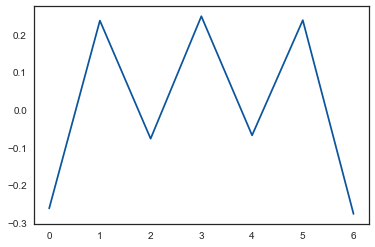

In [74]:
plt.plot(np.arange(NX-1), SiSj[0, 1:NX])

## $\left\langle S_{i}^{d_{z^2}} S_{j}^{d_{z^2}}\right\rangle$

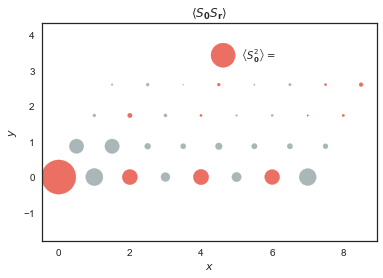

In [69]:
ref_row = 0

plt.figure(1, figsize = (8,8))
a1 = np.arange(NX)
a2 = np.arange(NY)
vs = np.zeros((NX * NY , 2))
clr = np.chararray((NX * NY), itemsize = 10)
v1 = np.array([1, 0])
v2 = np.array([1 / 2, np.sqrt(3) / 2])
for i in range(NX):
    for j in range(NY):
            vs[NX * j + i, :] =\
            a1[i] * v1 + a2[j] * v2 
            if (SiSj[ref_row, NX*j + i]) > 0:
                clr[NX * j + i] = "#e74c3c"
            else :
                clr[NX * j + i] = "#95a5a6"

dotscale = 1000

fig, ax = plt.subplots()

ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(SiSj[ref_row,:]),\
           c = clr.decode('UTF-8'), alpha = 0.8, edgecolors = None,\
          label = r'$\left\langle S_{\mathbf{0}}^2\right\rangle=$')
#ax.scatter(vs[:, 0], vs[:, 1], s = dotscale * abs(SiSjErr[0, :]),\
#           c = clr.decode('UTF-8'), alpha = 1, edgecolors = 'g', facecolors = None)
plt.axis('equal')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'$\left\langle S_{\mathbf{0}} S_{\mathbf{r}}\right\rangle$')
plt.legend(loc = (0.5, 0.8))

#plt.savefig(plotDir + '/S0Sr.png', dpi = 350)

## Longitudinal correlations along one of the edges

Text(0,0.5,'$\\left\\langle S_{0} S_{x} \\right\\rangle$')

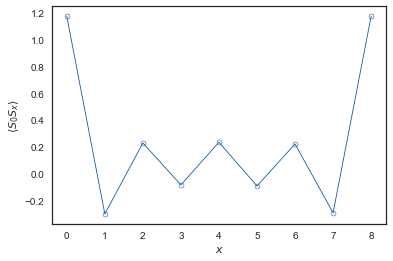

In [67]:
fig, ax = plt.subplots()

ax.errorbar(np.arange(NX+1), np.hstack([SiSj[0, :NX], SiSj[0, 0]]),\
            linewidth = 0.8, elinewidth = 0.8,\
            marker = 'o', markersize = 0.5, markeredgewidth = 5,)
            #yerr=np.hstack([SiSjErr[0, :NX], SiSjErr[0, 0]]))
plt.xlabel(r'$x$')
plt.ylabel(r'$\left\langle S_{0} S_{x} \right\rangle$')
#plt.yscale('log')
#plt.ylim(-0.1, 0.1)
#plt.savefig(plotDir + '/LongitudinalProfile.png', dpi = 350)